# Mathematical Walkthrough ✅

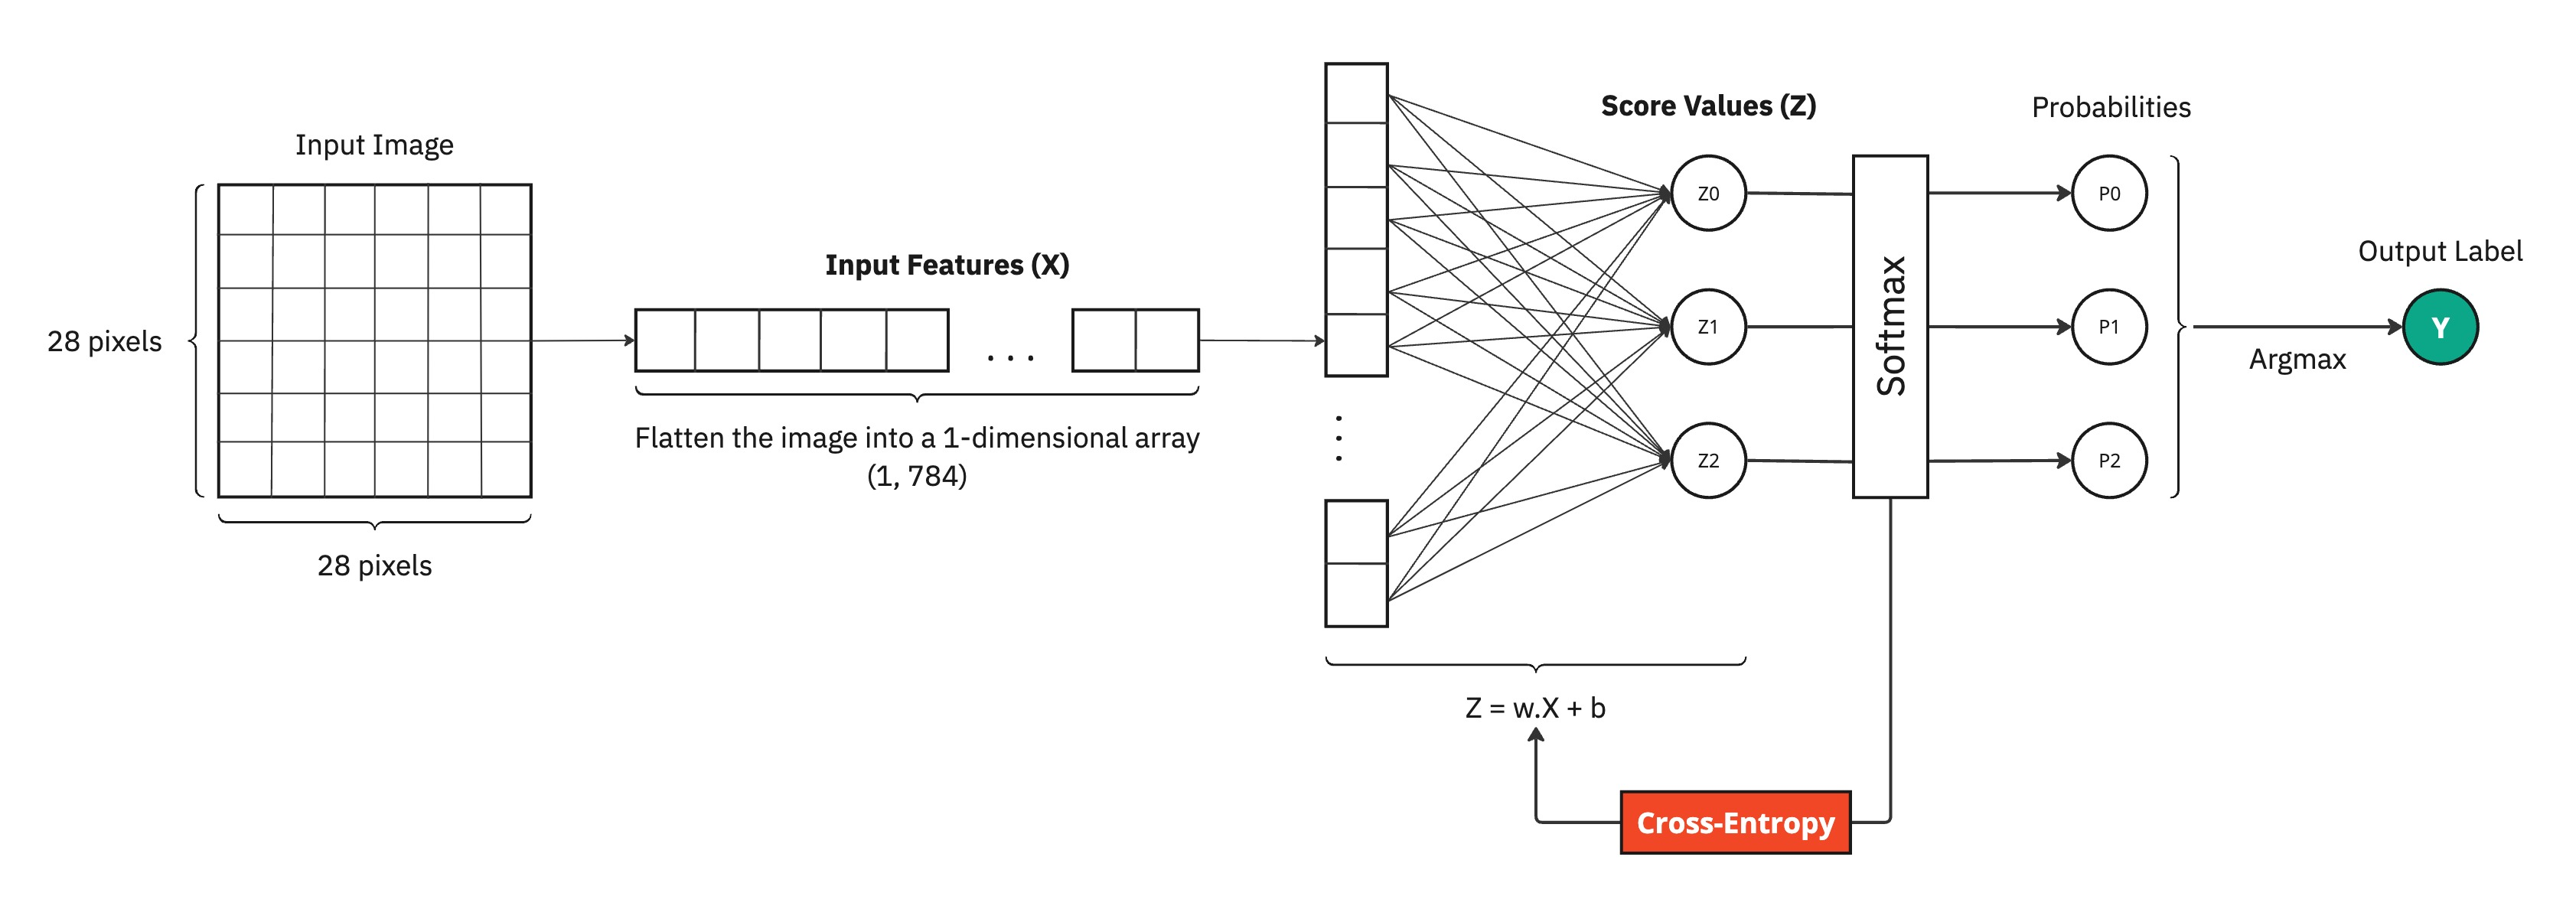



> Logistic Regression is often referred to as a discriminative classifier because we can view the distribution P(Y|X) as **directly discriminating the value of the target value Y** for any given instance X. (Machine Learning, Tom Mitchell, 2017)

Unlike Naive Bayes, multinomial logistic regression does not assume that the features are independent from one another. However, it is based on the assumption of **independence of irrelevant alternatives**. This assumption means the odds of preferring one class over another do not depend on the presence or absence of other "irrelevant" features. In other words, the relative probability of an image belong to a certain class does not change if we are to add another class to the model.

**1. Sofmax Function**
  - Each class is written as a function of X features. Before converting to probability, we compute the scores by taking the dot product between the input vector and weights. *The weight values are intialized as 0s*.
$$f(x)=\mathbf{w}^\text{T}X + \mathbf{b}$$

  - The softmax function outputs the probabilities of the class given the input features - it turns all the inputs into positive values and maps those values to the range of 0 to 1:
  $$\text{softmax}(z_i)=\frac{\exp(\mathbf{w}_k \cdot \mathbf{x} + b_k)}{\sum_{j=1}^K \exp(\mathbf{w}_k \cdot \mathbf{x} + b_k))} \ 1 \leq i \leq K$$

**2. Cross-entropy loss function**
- Maximizes the probability of the scoring vectors to the one-hot encoded Y (response) vectors. In other words, it minimizes a loss function corresponding to error on training examples.

**3. Stochastic Gradient Descent**
$$\\theta = \theta - \text{learning rate} \times \nabla L_i\theta, \text{ where } i \text{ is selected from the sample}
$$

$$w^{t+1} = w^{t} - ŋ\nabla L(f(x;w),y)$$
- The number of times the minimum is found in the loss function is known as the number of **epochs**.


# Import Libraries

In [1]:
import time

In [2]:
# File reading
import os
from google.colab import drive
from typing import List

In [3]:
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Image Preprocessing
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage.morphology import skeletonize, thin
from skimage import data
from skimage.util import invert

In [5]:
# sklearn
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [6]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **1. Pseudocode**

**Algorithm 3.1. One vs All Logistic Regression**


---

```
procedure LogisticRegression(learning_rate, df_train, class=k)
    K = [0, 1, 2] // Number of classes
    initialize W_k = zeros(K x (N + 1)) // K x (N + 1) matrix
    preprocess_labels(df_train, k) // Function to filter labels based on k

    X_train = df_train.drop(columns=["label"])
    y_train = df_train["label"]

    initialize loss = 0
    m = len(X_train) // Number of training examples

    for each x, y in zip(X_train, y_train) do
        z = W_k * [x; 1] // Include bias term
        y_hat = softmax(z) // Apply softmax across classes
        loss += -sum(y * log(y_hat)) // Categorical cross-entropy loss
    end for

    average_loss = loss / m
    g ← ∇LCE / W_k // Calculate gradients for each class

    W_k ← W_k - η * g // Update weights based on gradients
end procedure

function preprocess_labels(df_train, k)
    if k == 0 then
        df_train.loc[df_train['label'].isin([1, 2]), 'label'] = 0
    else if k == 1 then
        df_train.loc[df_train['label'].isin([0, 2]), 'label'] = 0
    else if k == 2 then
        df_train.loc[df_train['label'].isin([0, 1]), 'label'] = 0
end function
```


**Algorithm 3.2. Multinomial Logistic Regression**

---
```
procedure LogisticRegression(X, y, w)
    initialize W = [0, 0, ..., 0] (K x (N + 1) matrix)
    initialize loss = 0
    for each x_train, y_train in X_train, Y_train do
        Z = W * [x_train; 1] // Include bias term
        y_hat = softmax(Z) // Apply softmax to get probabilities
        loss += -sum(y_train * log(y_hat)) // Cross-entropy loss
    end for
    average_loss = loss / m
    gradient g ← ∇LCE / W = - (y - y_hat) * X_train // Update gradient calculation
    if g < 0 then
        W ← W - η * g // Update weights
end procedure
```




# Model Training

## Load Dataset

In [7]:
df_train010 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_010.csv")
df_train028 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_028.csv")
df_train064 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_064.csv")
df_train110 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_110.csv")
df_train128 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_128.csv")
df_train164 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Train Sets/feature_train_set_164.csv")

In [8]:
df_test010 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_010.csv")
df_test028 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_028.csv")
df_test064 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_064.csv")
df_test110 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_110.csv")
df_test128 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_128.csv")
df_test164 = pd.read_csv("/content/gdrive/MyDrive/24-25 Academic Year/CS156/First Pipeline/Preprocessed Data/Preprocessed Test Sets/feature_set_test_164.csv")

In [9]:
X_train010 = df_train010.drop(columns=['label'])
X_train028 = df_train028.drop(columns=['label'])
X_train064 = df_train064.drop(columns=['label'])
X_train110 = df_train110.drop(columns=['label'])
X_train128 = df_train128.drop(columns=['label'])
X_train164 = df_train164.drop(columns=['label'])

In [10]:
y_train010 = df_train010['label']
y_train028 = df_train028['label']
y_train064 = df_train064['label']
y_train110 = df_train110['label']
y_train128 = df_train128['label']
y_train164 = df_train164['label']

In [11]:
X_test010 = df_test010.drop(columns=['label'])
X_test028 = df_test028.drop(columns=['label'])
X_test064 = df_test064.drop(columns=['label'])
X_test110 = df_test110.drop(columns=['Unnamed: 0', 'label'])
X_test128 = df_test128.drop(columns=['Unnamed: 0', 'label'])
X_test164 = df_test164.drop(columns=['Unnamed: 0', 'label'])

In [12]:
y_test010 = df_test010['label']
y_test028 = df_test028['label']
y_test064 = df_test064['label']
y_test110 = df_test110['label']
y_test128 = df_test128['label']
y_test164 = df_test164['label']

## Manual Code

In [35]:
class OvALogReg:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        """
        Initializes the logistic regression model.

        Args:
            learning_rate (float): The learning rate for weight updates.
            n_iters (int): The number of iterations for training.
        """
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []  # To store loss values

    def binarize_labels(self, y):
        """
        Binarizes the labels into a one-hot encoded format.

        Args:
            y: Array-like, shape (n_samples,) - The labels to be binarized.

        Returns:
            A binary matrix of shape (n_samples, n_classes) where each row corresponds to the one-hot encoded representation of the label.
        """
        # Identify unique classes
        unique_classes = np.unique(y)
        n_classes = len(unique_classes)

        # Create a binary matrix
        binary_matrix = np.zeros((len(y), n_classes), dtype=int)

        for idx, label in enumerate(y):
            # Find the index of the class and set it to 1
            class_index = np.where(unique_classes == label)[0][0]
            binary_matrix[idx, class_index] = 1

        return binary_matrix

    def softmax(self, x):
        """
        Computes the softmax of the input array.

        Args:
            x: Input array of shape (n_samples, n_classes).

        Returns:
            Softmax probabilities of shape (n_samples, n_classes).
        """
        exp_x = np.exp(x - np.max(x))  # Numerical stability
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def score(self, X):
        """
        Computes the scores for each class.

        Args:
            X: Input feature matrix of shape (n_samples, n_features).

        Returns:
            Scores for each class.
        """
        return np.dot(X, self.weights.T) + self.bias

    def fit(self, X, y):
        """
        Fits the model to the training data.

        Args:
            X: Input feature matrix of shape (n_samples, n_features).
            y: Target labels (array-like).
        """
        start_time = time.time() # Start Time
        # Binarize labels
        y_bin = self.binarize_labels(y)

        n_samples, n_features = X.shape
        n_classes = y_bin.shape[1]  # Number of classes

        # Initialize weights and bias for one vs all
        self.weights = np.zeros((n_classes, n_features))  # Shape (n_classes, n_features)
        self.bias = np.zeros(n_classes)                   # Shape (n_classes)

        for _ in range(self.n_iters):
            scores = self.score(X)                # Shape (n_samples, n_classes)
            soft = self.softmax(scores)           # Shape (n_samples, n_classes)

            # Calculate loss using cross-entropy
            loss = -np.mean(np.log(soft[np.arange(n_samples), np.argmax(y_bin, axis=1)]))
            print(loss)
            self.loss_history.append(loss)

            # Gradient calculation for each class
            for i in range(n_classes):
                indicator = y_bin[:, i]  # One-hot encoding for class i
                gradient = np.dot(X.T, (soft[:, i] - indicator)) / n_samples
                self.weights[i] -= self.lr * gradient

                # Update bias terms
                self.bias[i] -= self.lr * np.mean(soft[:, i] - indicator)

        end_time = time.time() # End Time
        print(f"Training time: {end_time - start_time} seconds")

    def plot_loss(self):
        """Plots the loss over iterations."""
        plt.figure(figsize=(10, 5))
        plt.plot(self.loss_history, label='Loss')
        plt.title('Loss over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid()
        plt.show()

    def predict(self, X):
        """
        Predicts the class labels for the input data.

        Args:
            X: Input feature matrix of shape (n_samples, n_features).

        Returns:
            Predicted class labels.
        """
        start_time = time.time() # Start Time
        scores = self.score(X)
        soft = self.softmax(scores)

        end_time = time.time() # End Time
        print(f"Prediction time: {end_time - start_time} seconds")
        return np.argmax(soft, axis=1)  # Return class with highest probability

    def metrics(self, y_pred, y_true):
        """
        Calculate evaluation metrics including precision, recall, F1 score, and accuracy.

        Parameters:
        y_pred (np.ndarray): Predicted labels.
        y_true (np.ndarray): True labels.

        Returns:
        dict: A dictionary containing precision, recall, F1 score, and accuracy.
        """

        classes = sorted(set(y_true))
        metrics = {c: self._calculate_class_metrics(c, y_pred, y_true) for c in classes}

        accuracy = self._calculate_accuracy(y_pred, y_true)
        metrics['accuracy'] = accuracy

        # Calculate macro-averaged metrics
        metrics['macro_avg'] = self._calculate_macro_average(metrics, classes)

        return metrics

    def _calculate_class_metrics(self, c, y_pred, y_true):
        """Calculate metrics for a specific class."""
        tp = np.sum((y_pred == c) & (y_true == c))  # True positives
        fp = np.sum((y_pred == c) & (y_true != c))  # False positives
        fn = np.sum((y_pred != c) & (y_true == c))  # False negatives

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        return {'precision': precision, 'recall': recall, 'f1_score': f1_score}

    def _calculate_accuracy(self, y_pred, y_true):
        """Calculate overall accuracy."""
        correct_predictions = np.sum(y_pred == y_true)
        return correct_predictions / len(y_true)

    def _calculate_macro_average(self, metrics, classes):
        """Calculate macro-averaged precision, recall and F1 score."""
        macro_precision = np.mean([metrics[c]['precision'] for c in classes])
        macro_recall = np.mean([metrics[c]['recall'] for c in classes])
        macro_f1 = np.mean([metrics[c]['f1_score'] for c in classes])

        return {
            'precision': macro_precision,
            'recall': macro_recall,
            'f1_score': macro_f1
        }


In [28]:
class MultinomialLogReg:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        """
        Initializes the multinomial logistic regression model.

        Args:
            learning_rate (float): The learning rate for weight updates.
            n_iters (int): The number of iterations for training.
        """
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []  # To store loss values

    def softmax(self, x):
        """
        Computes the softmax of the input array.

        Args:
            x: Input array of shape (n_samples, n_classes).

        Returns:
            Softmax probabilities of shape (n_samples, n_classes).
        """
        exp_x = np.exp(x - np.max(x))  # Numerical stability
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def score(self, X):
        """
        Computes the scores for each class.

        Args:
            X: Input feature matrix of shape (n_samples, n_features).

        Returns:
            Scores for each class.
        """
        return np.dot(X, self.weights.T) + self.bias

    def fit(self, X, y):
        """
        Fits the model to the training data.

        Args:
            X: Input feature matrix of shape (n_samples, n_features).
            y: Target labels (array-like).
        """
        # Identify unique classes
        unique_classes = np.unique(y)
        n_classes = len(unique_classes)

        n_samples, n_features = X.shape

        # Initialize weights and bias for multinomial classification
        self.weights = np.zeros((n_classes, n_features))  # Shape (n_classes, n_features)
        self.bias = np.zeros(n_classes)                   # Shape (n_classes)

        for _ in range(self.n_iters):
            scores = self.score(X)                # Shape (n_samples, n_classes)
            soft = self.softmax(scores)           # Shape (n_samples, n_classes)

            # Calculate loss using cross-entropy
            loss = -np.mean(np.log(soft[np.arange(n_samples), y]))
            print(loss)
            self.loss_history.append(loss)

            # Gradient calculation
            for i in range(n_classes):
                indicator = (y == i).astype(float)  # One-hot encoding for class i
                gradient = np.dot(X.T, (soft[:, i] - indicator)) / n_samples
                self.weights[i] -= self.lr * gradient

                # Update bias terms
                self.bias[i] -= self.lr * np.mean(soft[:, i] - indicator)

    def plot_loss(self):
        """Plots the loss over iterations."""
        plt.figure(figsize=(10, 5))
        plt.plot(self.loss_history, label='Loss')
        plt.title('Loss over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid()
        plt.show()

    def predict(self, X):
        """
        Predicts the class labels for the input data.

        Args:
            X: Input feature matrix of shape (n_samples, n_features).

        Returns:
            Predicted class labels.
        """
        scores = self.score(X)
        soft = self.softmax(scores)

        return np.argmax(soft, axis=1)  # Return class with highest probability

  def metrics(self, y_pred, y_true):
      """
      Calculate evaluation metrics including precision, recall, F1 score, and accuracy.

      Parameters:
      y_pred (np.ndarray): Predicted labels.
      y_true (np.ndarray): True labels.

      Returns:
      dict: A dictionary containing precision, recall, F1 score, and accuracy.
      """

      classes = sorted(set(y_true))
      metrics = {c: self._calculate_class_metrics(c, y_pred, y_true) for c in classes}

      accuracy = self._calculate_accuracy(y_pred, y_true)
      metrics['accuracy'] = accuracy

      # Calculate macro-averaged metrics
      metrics['macro_avg'] = self._calculate_macro_average(metrics, classes)

      return metrics

  def _calculate_class_metrics(self, c, y_pred, y_true):
      """Calculate metrics for a specific class."""
      tp = np.sum((y_pred == c) & (y_true == c))  # True positives
      fp = np.sum((y_pred == c) & (y_true != c))  # False positives
      fn = np.sum((y_pred != c) & (y_true == c))  # False negatives

      precision = tp / (tp + fp) if (tp + fp) > 0 else 0
      recall = tp / (tp + fn) if (tp + fn) > 0 else 0
      f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

      return {'precision': precision, 'recall': recall, 'f1_score': f1_score}

  def _calculate_accuracy(self, y_pred, y_true):
      """Calculate overall accuracy."""
      correct_predictions = np.sum(y_pred == y_true)
      return correct_predictions / len(y_true)

  def _calculate_macro_average(self, metrics, classes):
      """Calculate macro-averaged precision, recall and F1 score."""
      macro_precision = np.mean([metrics[c]['precision'] for c in classes])
      macro_recall = np.mean([metrics[c]['recall'] for c in classes])
      macro_f1 = np.mean([metrics[c]['f1_score'] for c in classes])

      return {
          'precision': macro_precision,
          'recall': macro_recall,
          'f1_score': macro_f1
      }


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 103)

### Feature Set 1

In [36]:
logr010 = OvALogReg()
logr010.fit(X_train010, y_train010)

1.0986122886681096
1.091523355556617
1.088374051194766
1.1008851474420551
1.1637400158075324
1.3669649041753325
1.546517367474892
1.4997121846455537
1.5431363322523282
1.3771788039062731
1.7263770627146755
1.2069349981880215
1.5404518384809724
1.3351375948808915
1.6641871864962576
1.2133650294924296
1.5360135143728588
1.3095809658900714
1.5790616043827939
1.2494579434206046
1.531088878795423
1.2807183210702684
1.5109716074403454
1.2736924475494638
1.5012792996002566
1.2561769194035814
1.4911081631492635
1.2422090749391246
1.4767631047545489
1.2328653014146127
1.463473264648169
1.2220481982564826
1.4517802292078144
1.210094154849089
1.4400759956611113
1.1987511228621055
1.4283048212948382
1.1878206638351358
1.416857289155944
1.1768756218788325
1.4057098850387126
1.165955770773756
1.3948035806526211
1.1550996280756611
1.38414489354424
1.1442786443047208
1.373739415982957
1.1334684690146362
1.36359029607186
1.1226475758248644
1.353702999598469
1.1117925285298105
1.3440851602768589
1.10087

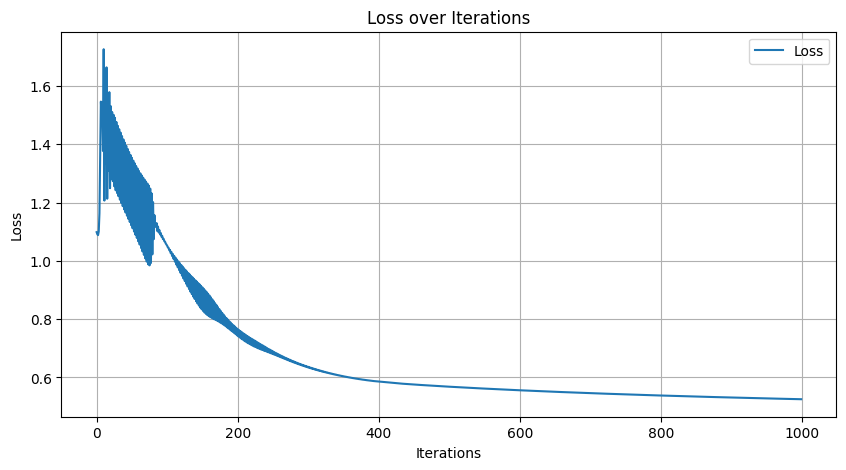

In [37]:
logr010.plot_loss()

In [38]:
y_pred010 = logr010.predict(X_test010)

Prediction time: 0.0007448196411132812 seconds


In [39]:
logr010.metrics(y_test010, y_pred010)

{0: {'precision': 0.6, 'recall': 0.8, 'f1_score': 0.6857142857142857},
 1: {'precision': 0.6363636363636364,
  'recall': 0.7,
  'f1_score': 0.6666666666666666},
 2: {'precision': 0.8333333333333334,
  'recall': 0.6,
  'f1_score': 0.6976744186046512},
 'accuracy': 0.6833333333333333,
 'macro_avg': {'precision': 0.6898989898989899,
  'recall': 0.7000000000000001,
  'f1_score': 0.6833517903285345}}

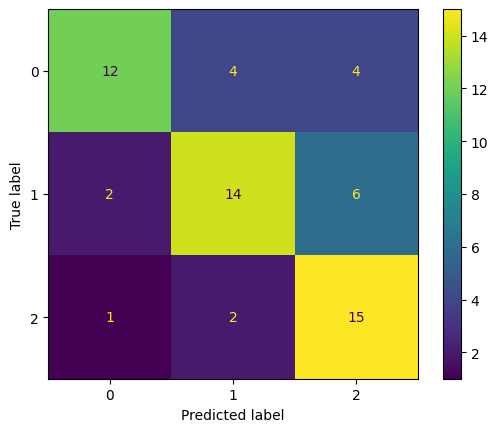

In [40]:
cm010 = confusion_matrix(y_test010, y_pred010)
disp010 = ConfusionMatrixDisplay(confusion_matrix=cm010)
disp010.plot()
plt.show()

### Feature 2

In [41]:
logr028 = OvALogReg()
logr028.fit(X_train028, y_train028)

1.0986122886681096
1.1588720445807685
12.04082188419174
25.070933420921605
34.54807825244726
9.772982613320814
24.994173972138316
36.18709985440166
7.535294014894311
24.647686079993584
37.82786421490518
5.592432474049408
22.764475969578964
39.41319325862197
5.185574827370923
22.183074082056525
40.10979290642734
3.6302391873597712
19.05869969593097
15.505814753628261
21.945661480459286
29.532411508037434
17.144678410573135
21.89791797858955
27.26124614862518
18.78353748124911
21.850135794507423
24.99008734193939
20.42239505203585
21.802347766233034
22.718929600827625
22.061252073353195
21.754558876539303
20.447772165029864
23.700104014192068
21.70676997678222
18.17662600975838
25.338522406808888
21.65899032636012
15.906474207781525
26.93872407589038
21.61202847830756
13.71009983591735
26.618442838333507
21.60601276934625
13.495215105060876
25.74190256201195
21.611841829387394
13.825954363205229
25.79999397718748
21.597870651065225
13.243451698286195
24.293600214878634
21.6171357972885
1

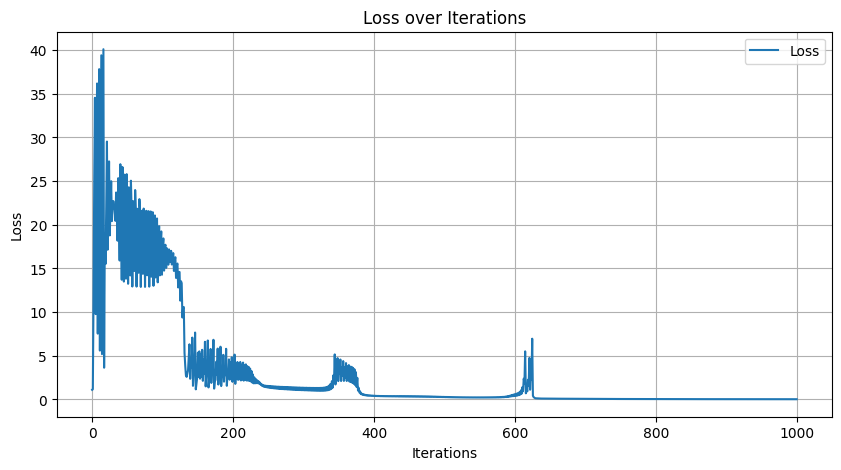

In [42]:
logr028.plot_loss()

In [43]:
ypred028 = logr028.predict(X_test028)

Prediction time: 0.002129793167114258 seconds


In [44]:
logr028.metrics(y_test028, ypred028)

{0: {'precision': 0.95, 'recall': 0.95, 'f1_score': 0.9500000000000001},
 1: {'precision': 0.9090909090909091,
  'recall': 0.9090909090909091,
  'f1_score': 0.9090909090909091},
 2: {'precision': 0.9444444444444444,
  'recall': 0.9444444444444444,
  'f1_score': 0.9444444444444444},
 'accuracy': 0.9333333333333333,
 'macro_avg': {'precision': 0.9345117845117844,
  'recall': 0.9345117845117844,
  'f1_score': 0.9345117845117845}}

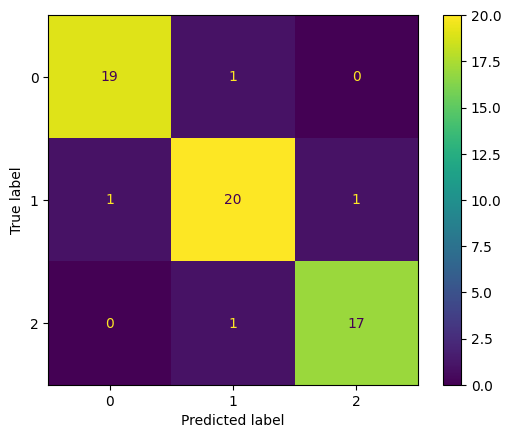

In [45]:
cm028 = confusion_matrix(y_test028, ypred028)
disp028 = ConfusionMatrixDisplay(confusion_matrix=cm028)
disp028.plot()
plt.show()

### Feature Set 3

In [46]:
logr064 = OvALogReg()
logr064.fit(X_train064, y_train064)

1.0986122886681096
2.8851377820332145
119.06681089676468
224.28503902157053
35.54336433244317
107.27275940598228
182.2347000835883
44.52074915739235
138.18906270903003
182.1642772637356
52.97044479333235
126.2324934384765
182.09385444398697
61.42014042265752
114.27592416792382
182.0234316242382
69.86983605198287
102.3193548973717
181.9530088041877
78.319531681312
90.36278803836178
181.88170245952531
86.76923928566994
78.64882906369968
155.06393807384333
95.57235058029868
93.90472745753966
154.99351525409458
104.02204620962365
81.94815818710897
154.92309238969136
112.47174183955624
69.99195766209968
154.71940479870688
120.92325051486839
58.67477604520806
120.89101468422402
129.81660523637018
80.86062676349276
120.82059186447499
138.266300865695
68.90405749293934
120.75016904472282
146.71599649502014
56.94748825537534
120.67973416748825
155.1656922886982
45.02114611125444
115.17052307145529
163.68917519717652
38.742722618814604
102.629392717374
166.62558823233815
39.624243802939354
105.2

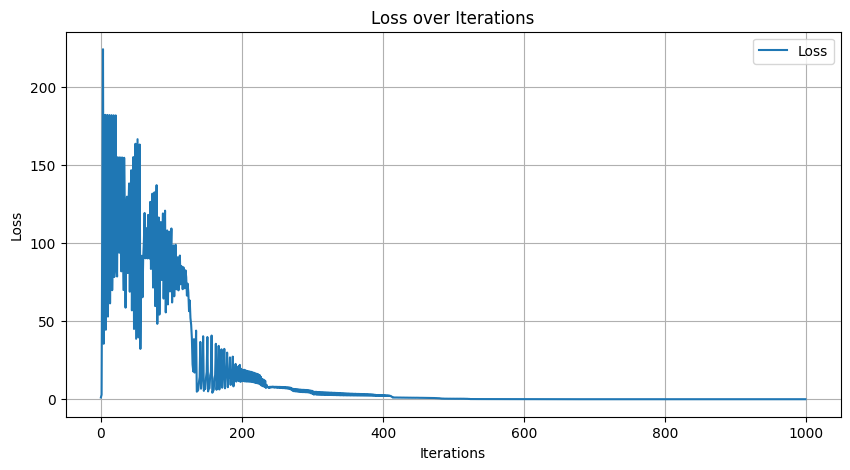

In [50]:
logr064.plot_loss()

In [47]:
y_pred064 = logr064.predict(X_test064)

Prediction time: 0.010825157165527344 seconds


In [48]:
logr064.metrics(y_test064, y_pred064)

{0: {'precision': 0.9, 'recall': 0.9, 'f1_score': 0.9},
 1: {'precision': 0.9090909090909091,
  'recall': 0.8695652173913043,
  'f1_score': 0.888888888888889},
 2: {'precision': 0.9444444444444444,
  'recall': 1.0,
  'f1_score': 0.9714285714285714},
 'accuracy': 0.9166666666666666,
 'macro_avg': {'precision': 0.9178451178451178,
  'recall': 0.9231884057971014,
  'f1_score': 0.9201058201058201}}

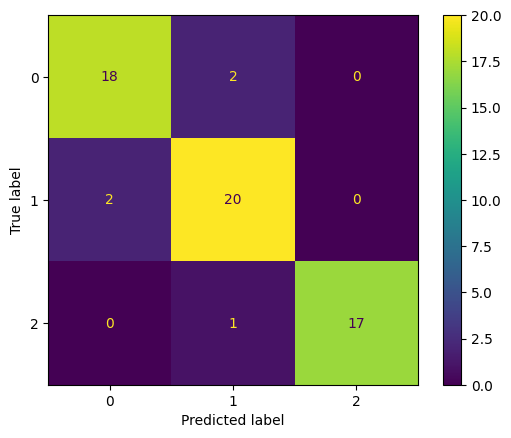

In [49]:
cm064 = confusion_matrix(y_test064, y_pred064)
disp064 = ConfusionMatrixDisplay(confusion_matrix=cm064)
disp064.plot()
plt.show()

### Feature Set 4

In [51]:
logr110 = OvALogReg()
logr110.fit(X_train110, y_train110)

1.0986122886681096
1.017949843705414
0.9458503190400303
0.8814945380240815
0.8242217946375121
0.7731698310405134
0.7278622685927523
0.6872491324008737
0.6514816732904843
0.6187975850014232
0.5906180841351104
0.5638826006004043
0.5411402662449858
0.5185691865354691
0.49866559518504305
0.47857179058215865
0.4599071379387665
0.44150306282963275
0.4242030690310169
0.4077667442788082
0.3925791863435555
0.3785607978160203
0.3657913610530768
0.354126602151336
0.34347184300009037
0.3336641565985998
0.3245783295053875
0.3160968881522096
0.30813390612469455
0.3006228065728693
0.2935147769071506
0.286771864639134
0.28036362361357
0.27426425805996835
0.26845124152465144
0.262904433516964
0.2576056360291444
0.25253829477200035
0.2476873008828342
0.24303882960681658
0.23858020684113304
0.23429979244569482
0.23018687796873108
0.2262315961001962
0.2224248403925763
0.21875819387827738
0.2152238654807207
0.21181463325496128
0.20852379362979773
0.2053451159335441
0.20227280158075114
0.19930144737845884
0

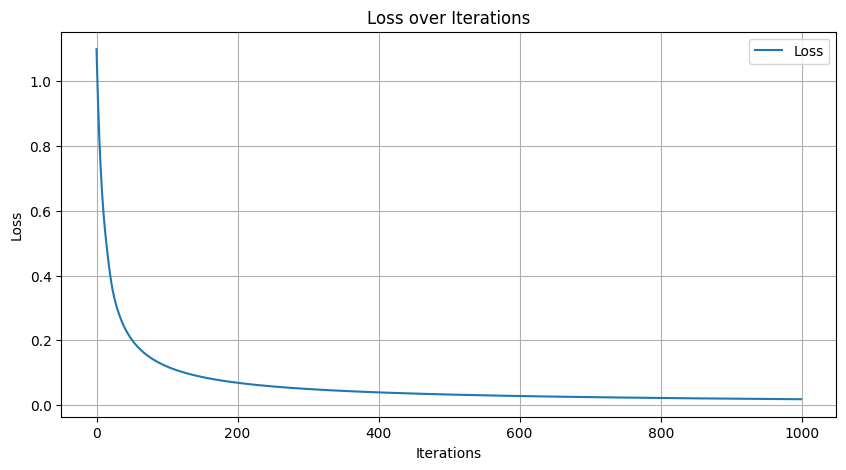

In [52]:
logr110.plot_loss()

In [53]:
y_pred110 = logr110.predict(X_test110)

Prediction time: 0.011530399322509766 seconds


In [54]:
logr110.metrics(y_test110, y_pred110)

{0: {'precision': 0.95, 'recall': 1.0, 'f1_score': 0.9743589743589743},
 1: {'precision': 1.0,
  'recall': 0.9565217391304348,
  'f1_score': 0.9777777777777777},
 2: {'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0},
 'accuracy': 0.9833333333333333,
 'macro_avg': {'precision': 0.9833333333333334,
  'recall': 0.9855072463768115,
  'f1_score': 0.9840455840455841}}

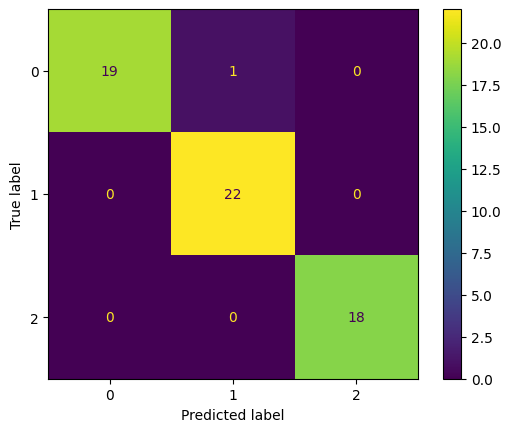

In [55]:
cm110 = confusion_matrix(y_test110, y_pred110)
disp110 = ConfusionMatrixDisplay(confusion_matrix=cm110)
disp110.plot()
plt.show()

### Feature 5

In [56]:
logr128 = OvALogReg()
logr128.fit(X_train128, y_train128)

1.0986122886681096
0.6220655865064643
2.5591600614036736
12.01878673365876
20.702134655679455
14.926346255747312
11.179588445442414
18.70506711765221
11.97973755021297
10.343264072222109
16.691310211747314
9.039893636888564
9.166774676293205
14.609226428882694
6.527533363715022
2.710158463244154
6.8700248879424635
1.22516557243568
3.509744509495178
3.244964275072228
2.9750845886320376
2.5237319035243386
2.7661971554902567
1.5334017510989009
1.7673198365212632
0.5947596181420995
0.3606893938516252
0.03240890175494161
0.019090824596655336
0.018600592131579233
0.01816002111383228
0.017738265705468024
0.017333358691115474
0.016944075269944608
0.016569393572078022
0.016208440176556056
0.01586045668169368
0.015524775052355829
0.015200799131829765
0.014887990626162362
0.014585858377566577
0.014293950086039316
0.014011845873191577
0.013739153245670209
0.013475503130788092
0.013220546739413306
0.012973953070908928
0.012735406918734003
0.012504607267884101
0.01228126599978329
0.01206510683879878

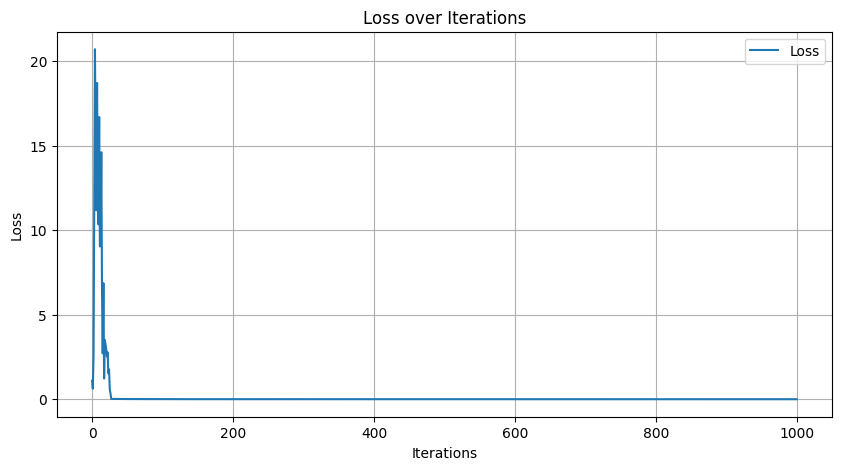

In [57]:
logr128.plot_loss()

In [58]:
y_pred128 = logr128.predict(X_test128)

Prediction time: 0.002299070358276367 seconds


In [59]:
logr128.metrics(y_test128, y_pred128)

{0: {'precision': 0.95, 'recall': 1.0, 'f1_score': 0.9743589743589743},
 1: {'precision': 1.0,
  'recall': 0.9565217391304348,
  'f1_score': 0.9777777777777777},
 2: {'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0},
 'accuracy': 0.9833333333333333,
 'macro_avg': {'precision': 0.9833333333333334,
  'recall': 0.9855072463768115,
  'f1_score': 0.9840455840455841}}

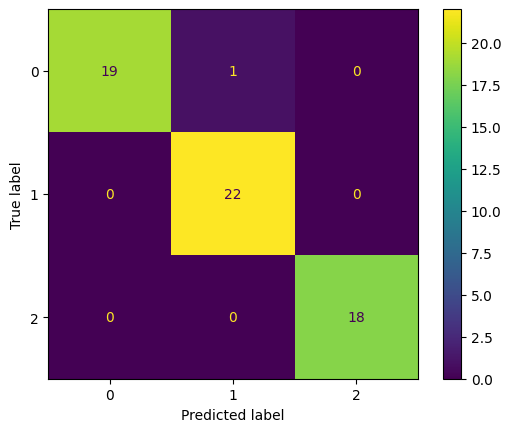

In [60]:
cm128 = confusion_matrix(y_test128, y_pred128)
disp128 = ConfusionMatrixDisplay(confusion_matrix=cm128)
disp128.plot()
plt.show()

### Feature 6

In [61]:
logr164 = OvALogReg()
logr164.fit(X_train164, y_train164)

1.0986122886681096
0.2275911446964855
31.800032435267955
90.49446434992588
143.0741306453839
21.730819388189595
62.8224700138206
14.470719067770716
35.19713703480591
75.67211058998312
107.28090860995418
24.939000607665836
70.94521295461848
50.06027593574242
29.291996609505993
0.06765659365138353
0.02721262974039929
0.024398011811246376
0.021958807254910402
0.019675894808765654
0.017535159576209672
0.015544512859571797
0.013714969348143924
0.012057161316691009
0.010577942325405758
0.009277417676628997
0.008148496285443204
0.007178263994343044
0.0063501153977945065
0.00564592379476019
0.00504778297820437
0.004539144029043412
0.00410539284737285
0.0037340169618841966
0.0034145204087786866
0.0031382115989400184
0.0028979463063255897
0.0026878725391456487
0.0025031999634234424
0.0023400021233046576
0.002195051988695406
0.0020656877667266605
0.001949704623075632
0.001845267843548936
0.0017508433794297857
0.0016651423174525422
0.001587076427331815
0.0015157224925229325
0.0014502935986006064
0

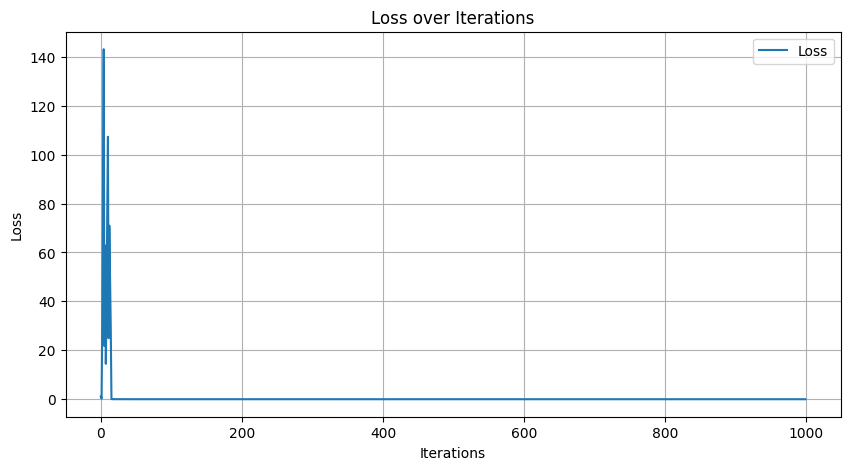

In [62]:
logr164.plot_loss()

In [63]:
y_pred164 = logr164.predict(X_test164)

Prediction time: 0.00841212272644043 seconds


In [64]:
logr164.metrics(y_test164, y_pred164)

{0: {'precision': 0.95, 'recall': 1.0, 'f1_score': 0.9743589743589743},
 1: {'precision': 0.9545454545454546,
  'recall': 0.9545454545454546,
  'f1_score': 0.9545454545454546},
 2: {'precision': 1.0,
  'recall': 0.9473684210526315,
  'f1_score': 0.972972972972973},
 'accuracy': 0.9666666666666667,
 'macro_avg': {'precision': 0.9681818181818181,
  'recall': 0.967304625199362,
  'f1_score': 0.9672924672924674}}

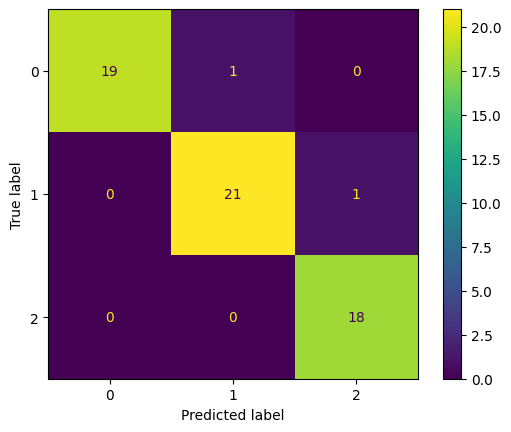

In [65]:
cm164 = confusion_matrix(y_test164, y_pred164)
disp164 = ConfusionMatrixDisplay(confusion_matrix=cm164)
disp164.plot()
plt.show()

## Built-in Library

In [73]:
model010 = LogisticRegression(solver="liblinear")
ovr_model010 = OneVsRestClassifier(model010)
ovr_model010.fit(X_train010, y_train010)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

In [74]:
y_pred010 = ovr_model010.predict(X_test010)

In [77]:
accuracy = accuracy_score(y_test010, y_pred010)
conf_matrix010 = confusion_matrix(y_test010, y_pred010)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix010)

Accuracy: 0.67
Confusion Matrix:
[[11  4  5]
 [ 2 14  6]
 [ 1  2 15]]


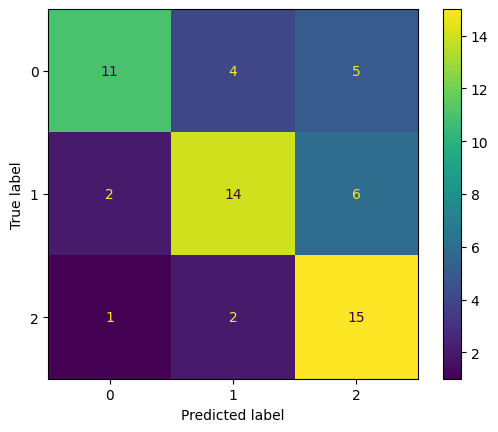

In [78]:
disp010 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix010)
disp010.plot()
plt.show()

In [79]:
model028 = LogisticRegression(solver="liblinear")
ovr_model028 = OneVsRestClassifier(model028)
ovr_model028.fit(X_train028, y_train028)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

In [80]:
ypred028 = ovr_model028.predict(X_test028)

In [81]:
accuracy028 = accuracy_score(y_test028, ypred028)
cf028 = confusion_matrix(y_test028, ypred028)

print(f'Accuracy: {accuracy028:.2f}')
print('Confusion Matrix:')

Accuracy: 0.95
Confusion Matrix:


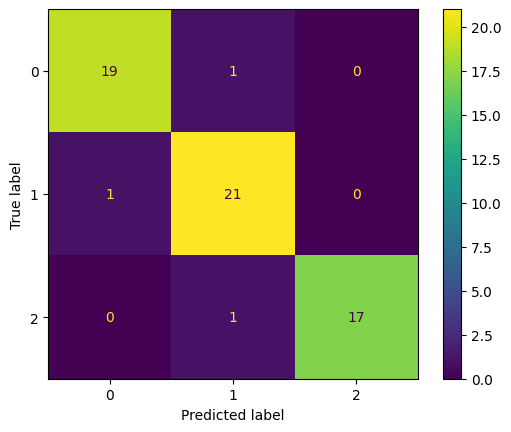

In [82]:
disp028 = ConfusionMatrixDisplay(confusion_matrix=cf028)
disp028.plot()
plt.show()

In [83]:
model064 = LogisticRegression(solver="liblinear")
ovr_model064 = OneVsRestClassifier(model064)
ovr_model064.fit(X_train064, y_train064)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

In [84]:
ypred064 = ovr_model064.predict(X_test064)

In [85]:
accuracy064 = accuracy_score(y_test064, ypred064)
cf064 = confusion_matrix(y_test064, ypred064)

print(f'Accuracy: {accuracy064:.2f}')

Accuracy: 0.97


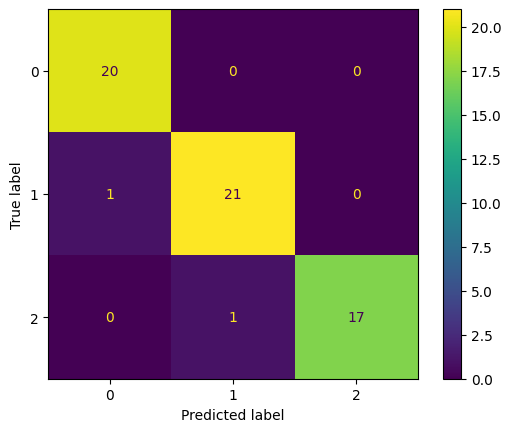

In [86]:
disp064 = ConfusionMatrixDisplay(confusion_matrix=cf064)
disp064.plot()
plt.show()

In [87]:
model110 = LogisticRegression(solver="liblinear")
ovr_model110 = OneVsRestClassifier(model110)
ovr_model110.fit(X_train110, y_train110)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

In [88]:
ypred110 = ovr_model110.predict(X_test110)

In [89]:
accuracy110 = accuracy_score(y_test110, ypred110)
cf110 = confusion_matrix(y_test110, ypred110)

print(f'Accuracy: {accuracy110:.2f}')

Accuracy: 0.98


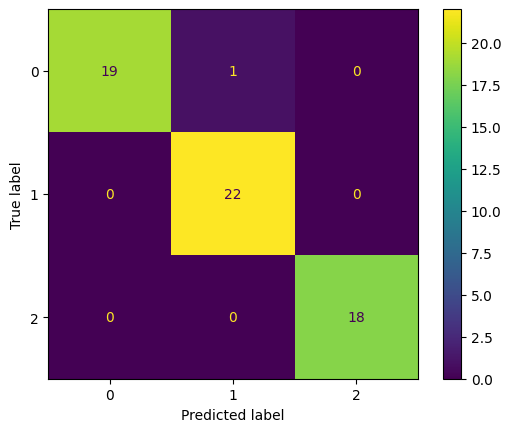

In [90]:
disp110 = ConfusionMatrixDisplay(confusion_matrix=cf110)
disp110.plot()
plt.show()

In [91]:
model128 = LogisticRegression(solver="liblinear")
ovr_model128 = OneVsRestClassifier(model128)
ovr_model128.fit(X_train128, y_train128)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

In [92]:
ypred128 = ovr_model128.predict(X_test128)

In [93]:
accuracy128 = accuracy_score(y_test128, ypred128)
cf128 = confusion_matrix(y_test128, ypred128)

print(f'Accuracy: {accuracy128:.2f}')

Accuracy: 0.98


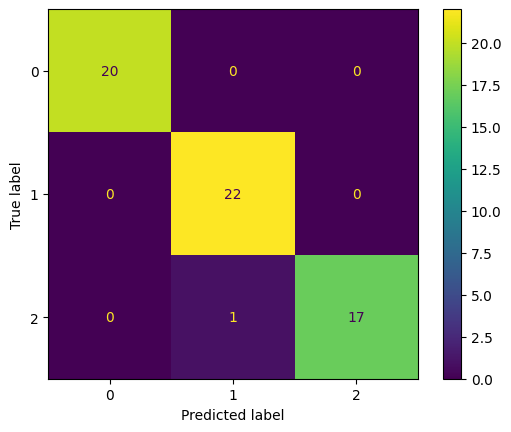

In [94]:
disp128 = ConfusionMatrixDisplay(confusion_matrix=cf128)
disp128.plot()
plt.show()

In [95]:
model164 = LogisticRegression(solver="liblinear")
ovr_model164 = OneVsRestClassifier(model164)
ovr_model164.fit(X_train164, y_train164)

OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

In [96]:
yred164 = ovr_model164.predict(X_test164)

In [97]:
accuracy164 = accuracy_score(y_test164, yred164)
cf164 = confusion_matrix(y_test164, yred164)

print(f'Accuracy: {accuracy164:.2f}')

Accuracy: 0.97


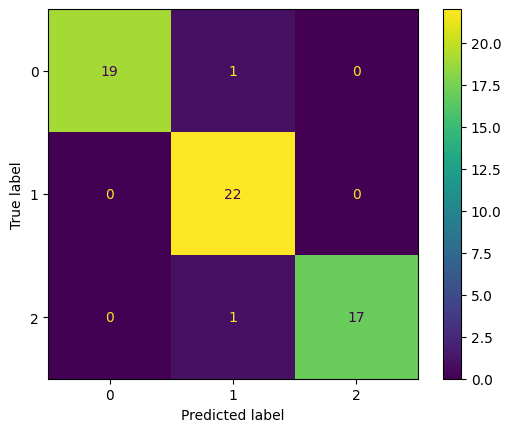

In [98]:
disp164 = ConfusionMatrixDisplay(confusion_matrix=cf164)
disp164.plot()
plt.show()